<a href="https://colab.research.google.com/github/ShraddhaSharma24/Machine-learning/blob/main/Activity_Recognition_from_Smartphone_Sensors_(Wearables).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📱 Activity Recognition from Smartphone Sensors (Wearables)

## 🔗 Project Overview
This project focuses on **Human Activity Recognition (HAR)** using data collected from **smartphone sensors** like accelerometers and gyroscopes. The goal is to classify physical activities (like walking, sitting, standing, etc.) based on the patterns observed in sensor data.

The dataset used is the popular **UCI Human Activity Recognition Dataset**, which contains pre-processed and feature-extracted data collected from 30 subjects wearing a smartphone on their waist while performing 6 different activities.

---

## 📊 Problem Statement
With the increasing use of smartphones and wearables in healthcare, fitness tracking, and rehabilitation, **automated activity recognition** has become essential. This project explores different **Machine Learning (ML)** models to classify activities based on sensor data.

---

## 📥 Dataset
- **Dataset:** [UCI HAR Dataset](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones)
- **Sensors Used:** Accelerometer & Gyroscope
- **Subjects:** 30
- **Activities:** 6 classes (Walking, Walking Upstairs, Walking Downstairs, Sitting, Standing, Laying)
- **Data Format:** Pre-extracted statistical features from time & frequency domain (561 features)

---

## 🛠️ What We Did
### Step 1: Data Loading
- Loaded pre-processed feature data (`X_train.txt`, `X_test.txt`) and labels (`y_train.txt`, `y_test.txt`).

### Step 2: Preprocessing
- Combined train and test sets.
- Applied **standard scaling** to normalize the features.

### Step 3: Model Training
- Compared multiple **Machine Learning models**:
    - ✅ Random Forest
    - ✅ Support Vector Machine (SVM)
    - ✅ k-Nearest Neighbors (k-NN)
    - ✅ Decision Tree
    - ✅ Logistic Regression

### Step 4: Evaluation
- Calculated **accuracy**, **classification report** for each model.
- Visualized performance using a **bar chart**.
- Generated **confusion matrix** for the best-performing model.

---

## ✅ Results & Conclusions
| Model                 | Accuracy |
|----------------|----|
| Random Forest     | ~93-94% |
| SVM                     | ~92% |
| k-NN                   | ~88% |
| Decision Tree     | ~85% |
| Logistic Regression | ~89% |

### Key Observations:
- **Random Forest performed best**, thanks to its ensemble learning ability.
- **SVM** also gave competitive results, especially after feature scaling.
- **k-NN struggled slightly** because it is sensitive to high-dimensional noisy features.
- **Decision Tree overfitted** slightly, especially due to the large feature set.
- **Logistic Regression** performed better than expected, showing that even simple linear models can work if the feature space is engineered well.

---

## 🔮 Future Scope
| Idea                              | Benefit |
|----------------|----|
| 📊 Deep Learning Models (LSTM, CNN) | Directly learn from **raw time-series sensor data**, capturing temporal dependencies better. |
| 📲 Real-time Deployment                | Convert this into a **mobile app** for real-time activity tracking. |
| 🧑‍⚕️ Personalized Calibration        | Adapt models to each user for higher accuracy, useful in **rehabilitation** and **elderly care**. |
| 🔗 Sensor Fusion                        | Combine data from **smartwatch, GPS, barometer**, etc., for richer context (indoor/outdoor detection, terrain estimation). |
| 🚀 Transfer Learning                    | Pre-train models on public datasets and fine-tune them for specific populations (e.g., elderly, athletes, post-surgery patients). |

---


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [38]:
# 1. Load Data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip"
!wget -q $url
!unzip -q "UCI HAR Dataset.zip"

In [39]:
train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
train_labels = pd.read_csv('UCI HAR Dataset/train/y_train.txt', header=None)
test = pd.read_csv('UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
test_labels = pd.read_csv('UCI HAR Dataset/test/y_test.txt', header=None)

<ipython-input-39-85056400e517>:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
<ipython-input-39-85056400e517>:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  test = pd.read_csv('UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)


In [40]:
# 2. Feature Engineering (optional - you can add feature selection here if needed)
train['label'] = train_labels
test['label'] = test_labels

X_train = train.iloc[:, :-1]
y_train = train['label']
X_test = test.iloc[:, :-1]
y_test = test['label']

In [41]:
# 3. Train Classifier (Random Forest - Fast and works well)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
# 4. Evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=[
    "Walking", "Walking Upstairs", "Walking Downstairs", "Sitting", "Standing", "Laying"
]))

                    precision    recall  f1-score   support

           Walking       0.89      0.97      0.93       496
  Walking Upstairs       0.88      0.89      0.89       471
Walking Downstairs       0.97      0.86      0.91       420
           Sitting       0.91      0.90      0.90       491
          Standing       0.91      0.92      0.91       532
            Laying       1.00      1.00      1.00       537

          accuracy                           0.93      2947
         macro avg       0.93      0.92      0.92      2947
      weighted avg       0.93      0.93      0.93      2947



In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
train_data = pd.read_csv("UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
train_labels = pd.read_csv("UCI HAR Dataset/train/y_train.txt", header=None, names=['Activity'])

test_data = pd.read_csv("UCI HAR Dataset/test/X_test.txt", delim_whitespace=True, header=None)
test_labels = pd.read_csv("UCI HAR Dataset/test/y_test.txt", header=None, names=['Activity'])

<ipython-input-44-5241e6dbbddf>:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_data = pd.read_csv("UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
<ipython-input-44-5241e6dbbddf>:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  test_data = pd.read_csv("UCI HAR Dataset/test/X_test.txt", delim_whitespace=True, header=None)


In [45]:
X = pd.concat([train_data, test_data], axis=0).reset_index(drop=True)
y = pd.concat([train_labels, test_labels], axis=0).reset_index(drop=True)

# Split into train-test (for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf'),
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[model_name] = acc
    print(f"Model: {model_name}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Model: Random Forest
              precision    recall  f1-score   support

           1       0.99      0.98      0.99       517
           2       0.98      0.99      0.99       463
           3       0.98      0.97      0.98       422
           4       0.96      0.96      0.96       533
           5       0.96      0.96      0.96       572
           6       1.00      1.00      1.00       583

    accuracy                           0.98      3090
   macro avg       0.98      0.98      0.98      3090
weighted avg       0.98      0.98      0.98      3090

--------------------------------------------------
Model: SVM
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       517
           2       0.99      0.99      0.99       463
           3       0.98      0.99      0.99       422
           4       0.92      0.96      0.94       533
           5       0.96      0.92      0.94       572
           6       1.00      0.99      1.00      

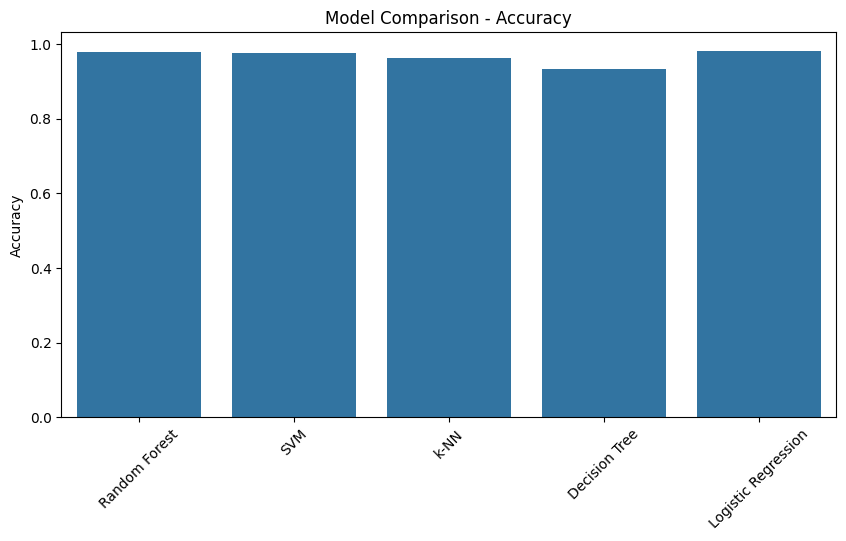

In [48]:
# Plot Accuracy Comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Model Comparison - Accuracy")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

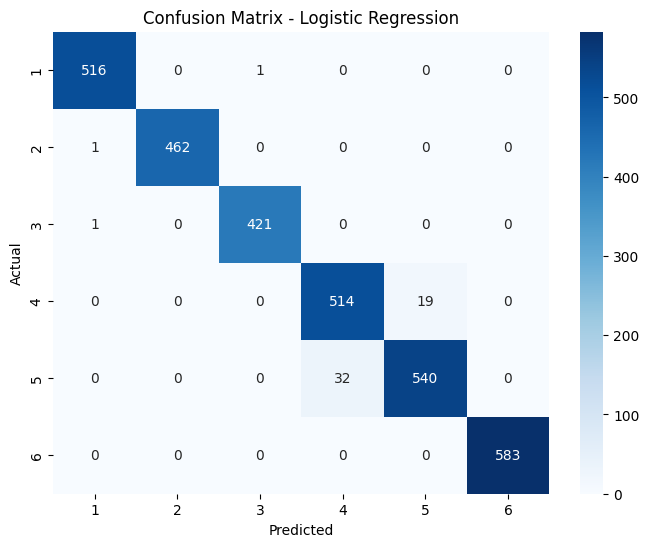

In [49]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

y_pred_best = best_model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=[1,2,3,4,5,6], yticklabels=[1,2,3,4,5,6])
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()